In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [ ]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [ ]:
print(df.head())

      crim    zn  indus  chas    nox  ...  tax  ptratio       b  lstat  medv
0  0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222     18.7  396.90   5.33  36.2

[5 rows x 14 columns]


In [ ]:
df['neighbour'] = np.random.rand(len(df))
print(df.head())

        crim    zn  indus  chas  ...  lstat  medv  random_col  neighbour
0.0  0.00632  18.0   2.31   0.0  ...   4.98  24.0    0.575154   0.433435
1.0  0.02731   0.0   7.07   0.0  ...   9.14  21.6    0.463030   0.091423
2.0  0.02729   0.0   7.07   0.0  ...   4.03  34.7    0.215839   0.151510
3.0  0.03237   0.0   2.18   0.0  ...   2.94  33.4    0.560546   0.971748
4.0  0.06905   0.0   2.18   0.0  ...   5.33  36.2    0.102988   0.281413

[5 rows x 16 columns]


In [ ]:
print("\Missing Values:\n", df.isnull().sum())

\Missing Values:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [ ]:
df.loc[5:10, 'crim'] = np.nan
df.loc[15:18, 'age'] = np.nan


In [ ]:
df['crim'] = df['crim'].fillna(df['crim'].mean())
df['age'] = df['age'].fillna(df['age'].median())

In [ ]:
Q1 = df['tax'].quantile(0.25)
Q3 = df['tax'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['tax'] < Q1 - 1.5 * IQR) | (df['tax'] > Q3 + 1.5 * IQR)]
print(f"Number of outliers in 'tax': {outliers.shape[0]}")

Number of outliers in 'tax': 0


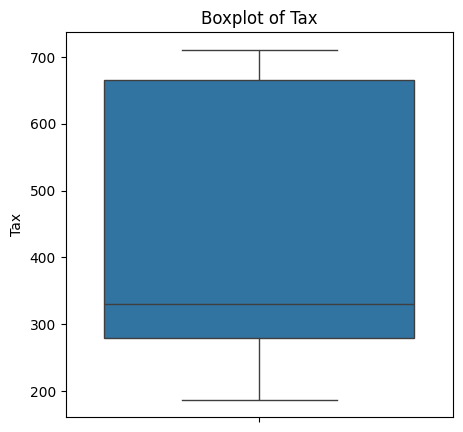

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['tax'])
plt.title('Boxplot of Tax')
plt.ylabel('Tax')
plt.show()

In [ ]:
df['neighbour']='a'
df.loc[1:5,'neighbour']='b'
df.loc[6:10,'neighbour']='c'

display(df.head(15))



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,random_col,neighbour,neighbour_encoded
0.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0.575154,a,1
1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0.463030,b,2
2.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0.215839,b,0
3.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0.560546,b,1
4.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0.102988,b,0
5.0,NaN,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,0.227429,b,2
6.0,NaN,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9,0.526208,c,2
7.0,NaN,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1,0.728818,c,0
8.0,NaN,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5,0.022029,c,2
9.0,NaN,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,0.278425,c,1


In [ ]:
neighbour_mapping = {'a': 0, 'b': 1, 'c': 2}
df['neighbour_encoded'] = df['neighbour'].map(neighbour_mapping)
display(df.head(15))

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,random_col,neighbour,neighbour_encoded
0.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0.575154,a,0
1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0.463030,b,1
2.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0.215839,b,1
3.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0.560546,b,1
4.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0.102988,b,1
5.0,NaN,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,0.227429,b,1
6.0,NaN,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9,0.526208,c,2
7.0,NaN,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1,0.728818,c,2
8.0,NaN,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5,0.022029,c,2
9.0,NaN,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,0.278425,c,2
